<a href="https://colab.research.google.com/github/jieunjeon/Data-Science-Fundamental/blob/master/Exploration/%5BE_18%5D_Retail_shop_Sign_Detector_with_Google_OCR_API_Keras_OCR_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retaion Shop Sign Detector with Google-OCR-API, Keras-OCR, Tesseract

Goal of this project:
1. Understand the process of OCR.
2. Understand the expression method of character recognition results.
3. Compare OCR-API, Keras-OCR, and Tesseract on outdoor sign images


## Dataset
I downloaded the business sign images from KAIST Scene Text Database: http://www.iapr-tc11.org/mediawiki/index.php?title=KAIST_Scene_Text_Database

## Table of Contents
1. Load the Data
2. Google OCR API
3. Keras-OCR
4. Tesseract


# 1. Load the *Data*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install keras_ocr

In [3]:
!pip install google-cloud-vision

In [4]:
!pip install --upgrade google-api-python-client

In [5]:
!pip install pytesseract

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import keras_ocr
import io
import cv2 

from google.cloud import vision
from pytesseract import Output
from pytesseract import pytesseract as pt

In [7]:
import os
from glob import glob
main_dir = '/content/drive/My Drive/Aiffel/LMS/EX_18/data/'
images_path = glob(main_dir+'*.JPG')
images_path

['/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC03229.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC03317.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC03264.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC03731.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC03761.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC03759.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC03865.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC04047.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC03765.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC04163.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC04397.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/P1010015.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC04437.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/IMG_2481.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/DSC04361.JPG',
 '/content/drive/My Drive/Aiffel/LMS/EX_18/data/P101006

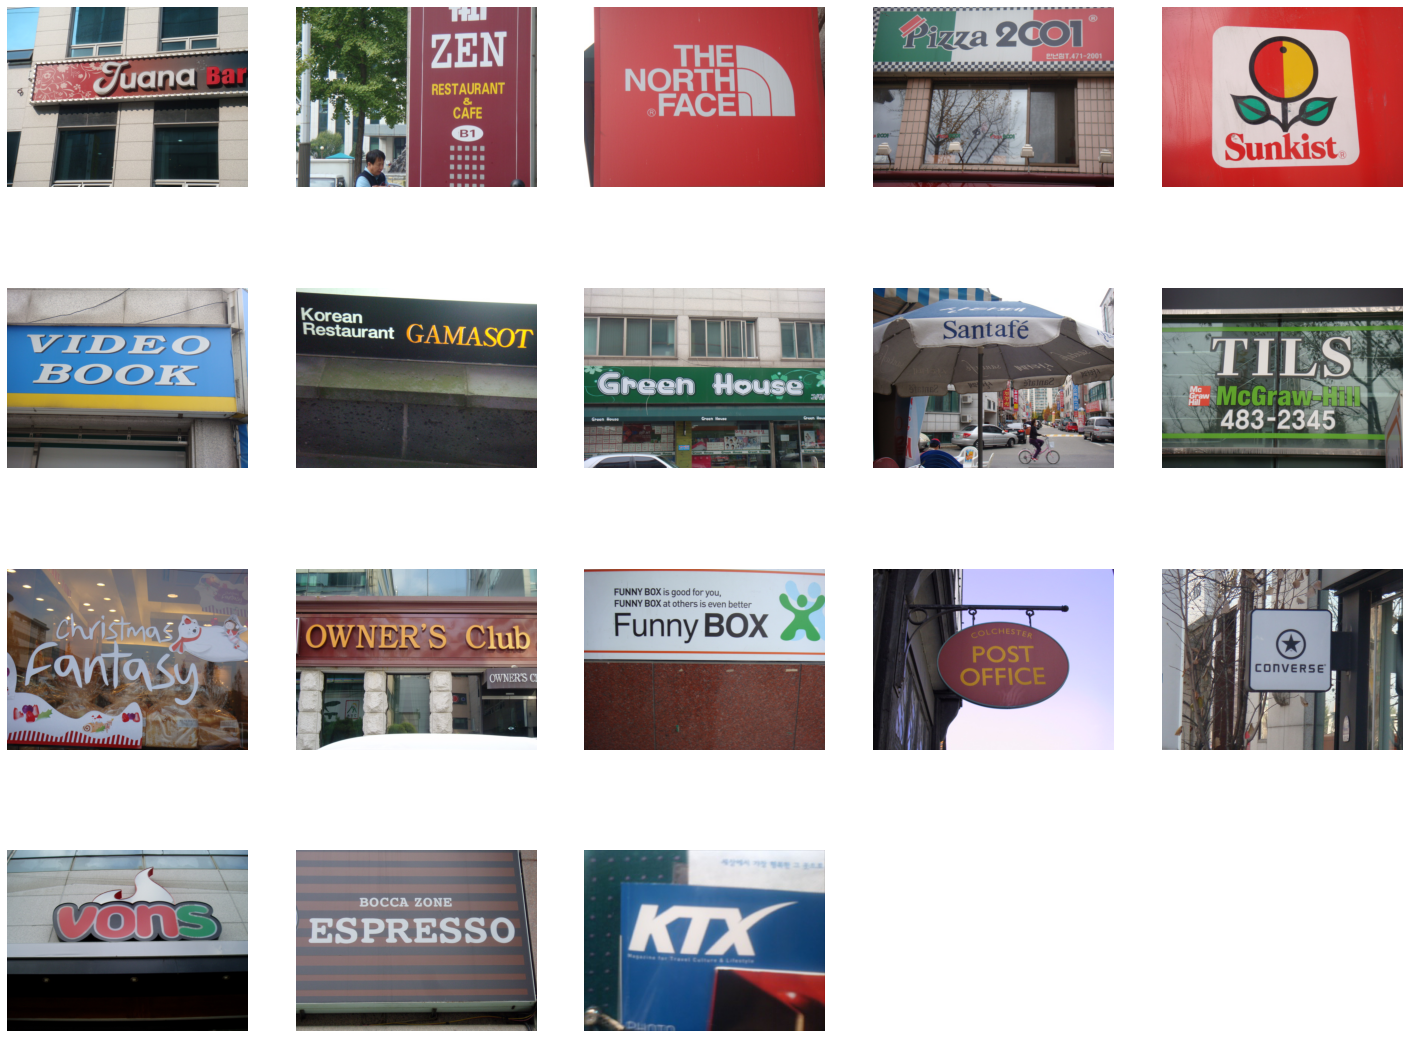

In [8]:
plt.figure(figsize=(20, 20))

for idx, image in enumerate(images_path):
    plt.subplot(5, 5, idx+1)
    im=img.imread(image)
    plt.imshow(im)
    plt.axis('off')

# 2. Google OCR API

Set the path to my GCP API credential. I had to setup a billing account to enable the GCP Vision API.

In [17]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  '/content/drive/My Drive/credentials/gcp-wisc-vision-api.json'

In [21]:
def detect_text(path):
    """Detects text in the file."""
    text_dec = []
    bounds = []
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    s = os.path.splitext(path)
    s = os.path.split(s[0])
    name = s[1]
    
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    for text in texts:
        text_dec.append(text.description.replace('\n',''))
        vertices = text.bounding_poly
        bounds.append(vertices)
    
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
    return name, text_dec, bounds

In [23]:
def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return image

In [24]:
ocr_img = []
ocr_dict = {}

for path in images_path:
    name, text_dec, bounds = detect_text(path)
    ocr_dict[name] = text_dec
    image = Image.open(path)
    draw_boxes(image, bounds, 'red')
    ocr_img.append(image)

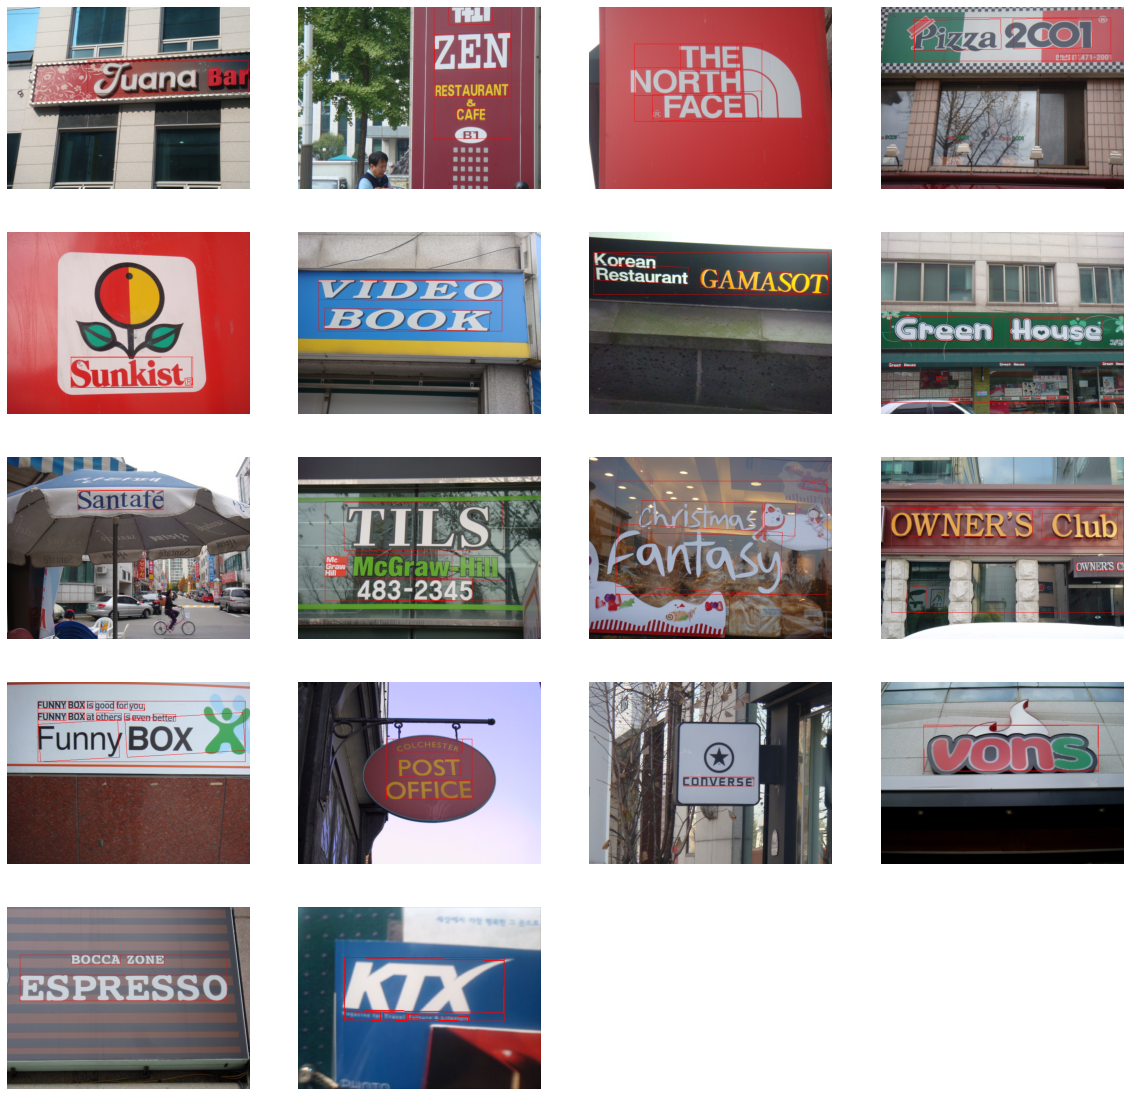

In [77]:
plt.figure(figsize=(20, 20))

for idx, img in enumerate(ocr_img):
    plt.subplot(5, 4, idx+1)
    plt.imshow(img)
    plt.axis('off')

It is detecting the letters very well.

# 3. Keras-OCR
keras-ocr will automatically download models for detectors and recognizers. 

In [26]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [27]:
# import keras_ocr
images = [ keras_ocr.tools.read(im) for im in images_path]
predictions = [pipeline.recognize([im]) for im in images_path]

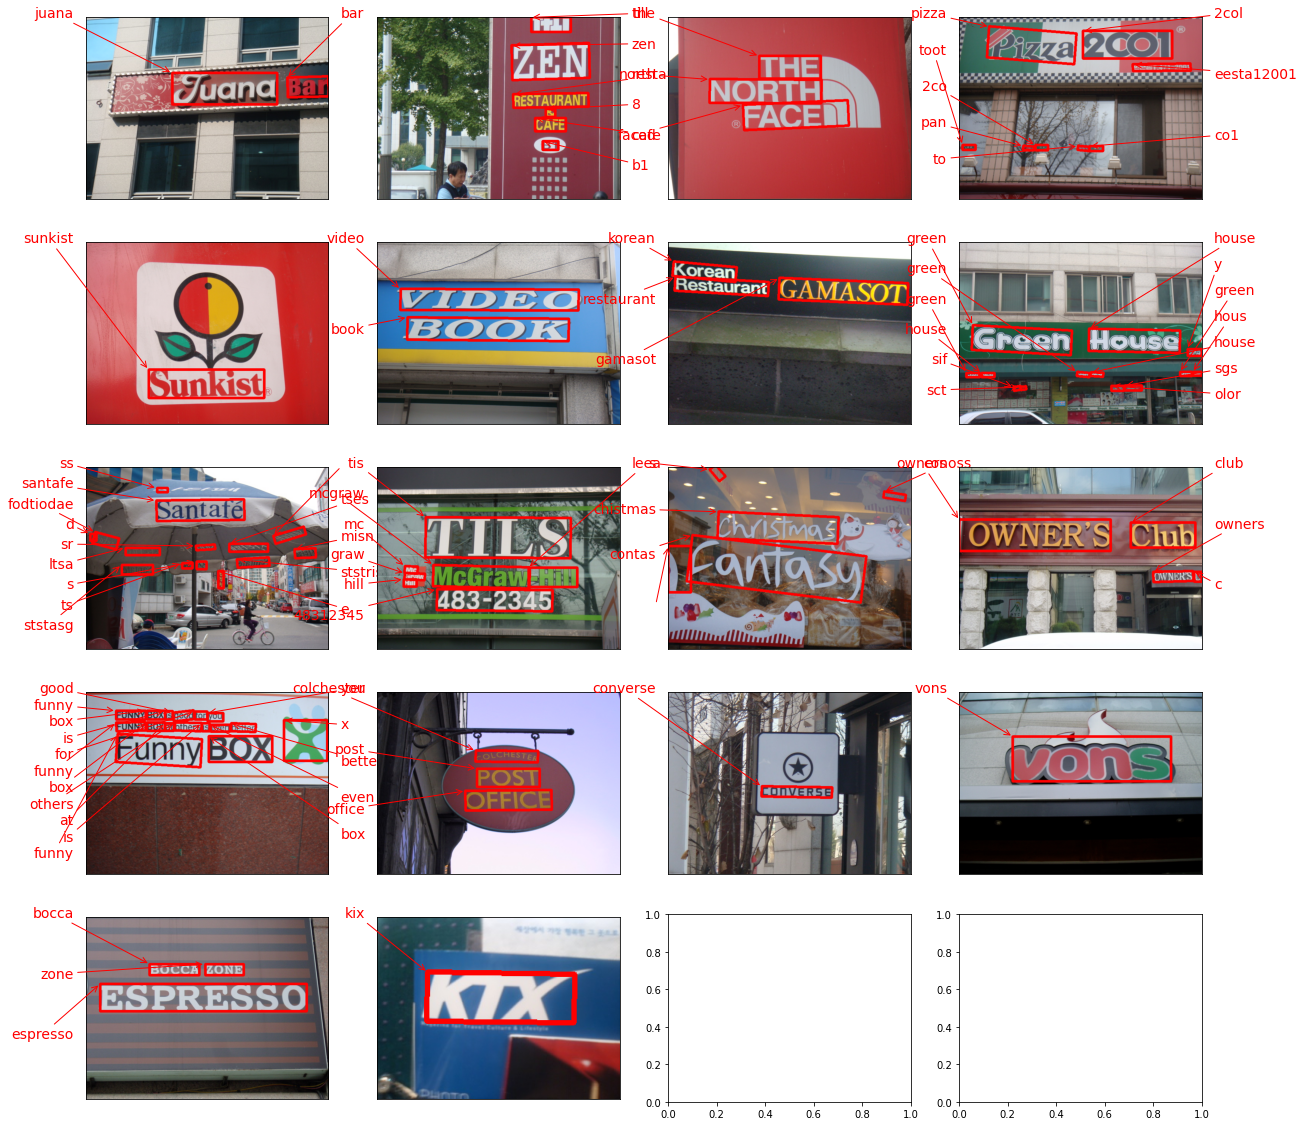

In [76]:
# plot the predictions
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

cnt = 0
for idx, ax in enumerate(axs):
  for idx_p, plot in enumerate(ax):
      keras_ocr.tools.drawAnnotations(image=images[4*idx + idx_p], predictions=predictions[4*idx + idx_p][0], ax=axs[idx, idx_p])
      if cnt == len(images_path):
        break
      cnt += 1

Also looks fine on the Keras-OCR, but not better than Google's OCR-API.

# 4. Tesseract

In [82]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (30.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [83]:
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 0s (6,470 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This fr

In [114]:

import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path, output_path):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)
    image_name = image_path.split('/')[-1].split('.')[0]

# pytesseract 의 Output 을 사용해서 결과값의 형식을 딕셔너리(DICT) 형식으로 설정해주게 됩니다.
    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{image_name}_{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [125]:
work_dir = main_dir + "output/"
for img_path in images_path:
    cropped_image_path_list = crop_word_regions(img_path, work_dir)

In [132]:
recognized_texts = []
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(work_dir + image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',   
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        recognized_texts.append(recognized_data['text'])
    print("Done")
    
cropped_image_path_list = listdir(work_dir)
recognize_images(cropped_image_path_list)

Done


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


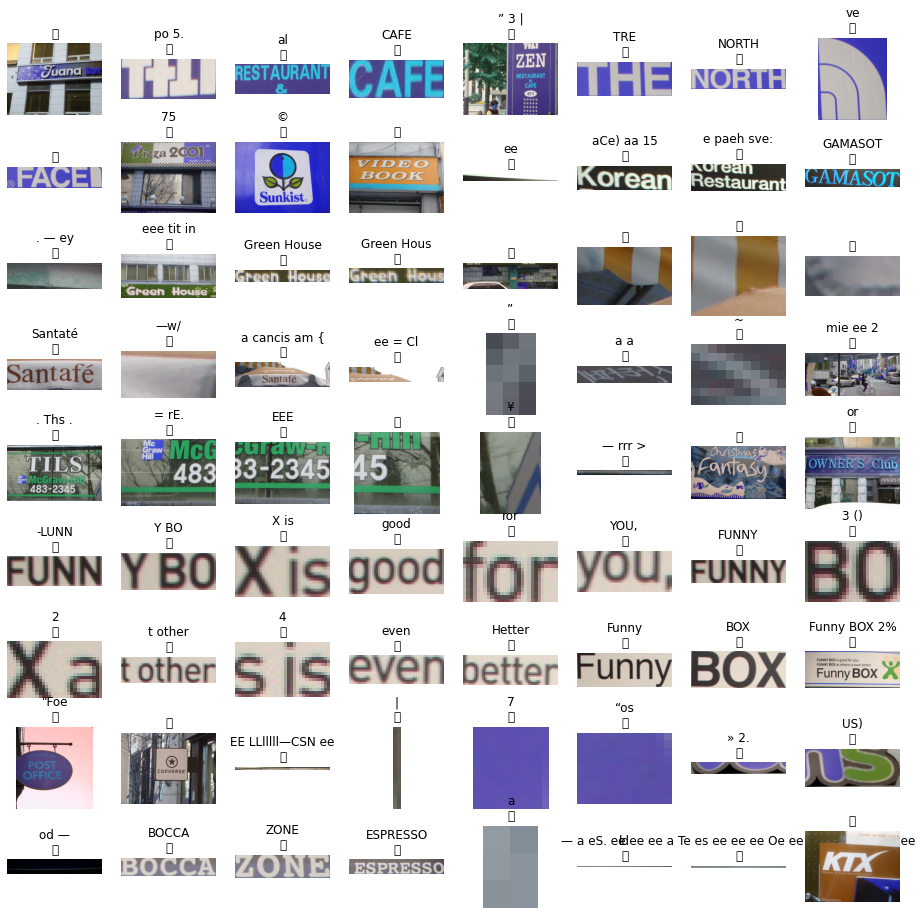

In [142]:
import cv2 as cv

plt.figure(figsize=(16, 16))
for idx,img in enumerate(cropped_image_path_list):
    plt.subplot(9,8,idx+1)   
    plt.imshow(cv.imread(work_dir+img))
    plt.title(recognized_texts[idx])
    plt.axis('off')

# Conclusion
## Results
- It looks like Google's OCR-API works better then Keras-OCR, and Tesseract was poor at segmentation of the words. It was weak at numbers and the reatil shop's logo (It tried to convert the logo to a text).
- By using Google's OCR-API, I can create an useful service that can recognizes the retail shops' sign.


## What I've learned
- Utilize Google OCR Vision API, Keras-OCR, and Tesseract.
- Compare OCR-API, Keras-OCR, and Tesseract on outdoor sign images.